In [336]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split as tts

In [110]:
% matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [111]:
data = pd.read_csv('cereals.csv', na_values=-1).dropna()
data.set_index('name', inplace=True)
data.head()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
name,,,,,,,,,,,,,,
100%_Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1,0.33
100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1,1.00
All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1,0.33
All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1,0.50
Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75


In [112]:
#train, test = tts(data, test_size=.33)

In [113]:
pca_1 = PCA(n_components=2)

In [114]:
data_1 = data.ix[:, 3:]

In [115]:
pca_1.fit(data_1)
reduced_data_1 = pca_1.transform(data_1)

In [116]:
df_1 = pd.DataFrame(reduced_data_1)

###Unmodified Data

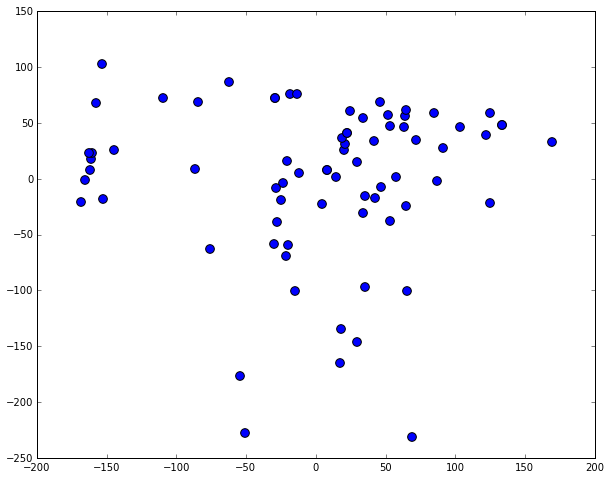

In [117]:
plt.scatter(reduced_data_1[:,0], reduced_data_1[:,1], s=75)

This data is quite variant, let's make it abit more clear.

In [118]:
kmeans_1 = KMeans(7)
pred = kmeans_1.fit_predict(reduced_data_1)

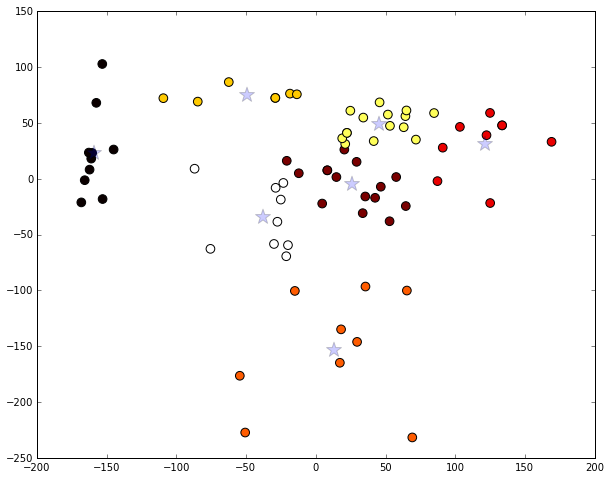

In [119]:
plt.scatter(reduced_data_1[:,0], reduced_data_1[:,1], c=pred, cmap='hot', s=75)
plt.scatter(kmeans_1.cluster_centers_[:,0], 
            kmeans_1.cluster_centers_[:,1], alpha=.2, s=250, marker='*')

Let's see if we can't hack down some of that variation!

In [105]:
v = lambda x: 1/x

In [157]:
data_2 = data_1.drop('shelf',1)

In [158]:
data_2['normcup'] = data_2.cups.apply(v)

In [159]:
data_2p1 = data_2.multiply(data_2.normcup, axis=0)

In [188]:
data_2p2 = data_2p1.drop(['normcup', 'cups'], axis=1)
data_2p2.head()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight
name,,,,,,,,,
100%_Bran,12.121212,3.030303,393.939394,30.303030,15.151515,18.181818,848.484848,75.757576,3.030303
100%_Natural_Bran,3.000000,5.000000,15.000000,2.000000,8.000000,8.000000,135.000000,0.000000,1.000000
All-Bran,12.121212,3.030303,787.878788,27.272727,21.212121,15.151515,969.696970,75.757576,3.030303
All-Bran_with_Extra_Fiber,8.000000,0.000000,280.000000,28.000000,16.000000,0.000000,660.000000,50.000000,2.000000
Apple_Cinnamon_Cheerios,2.666667,2.666667,240.000000,2.000000,14.000000,13.333333,93.333333,33.333333,1.333333


In [166]:
pca_2 = PCA(n_components=2)
pca_2.fit(data_2p2)
reduced_data_2 = pca_2.transform(data_2p2)

In [368]:
kmeans_2 = KMeans(3)
pred_2 = kmeans_2.fit_predict(reduced_data_2)
kmeans_2p1 = KMeans(6)
pred_2p1 = kmeans_2p1.fit_predict(reduced_data_2)

## Two kinds of normalized data:

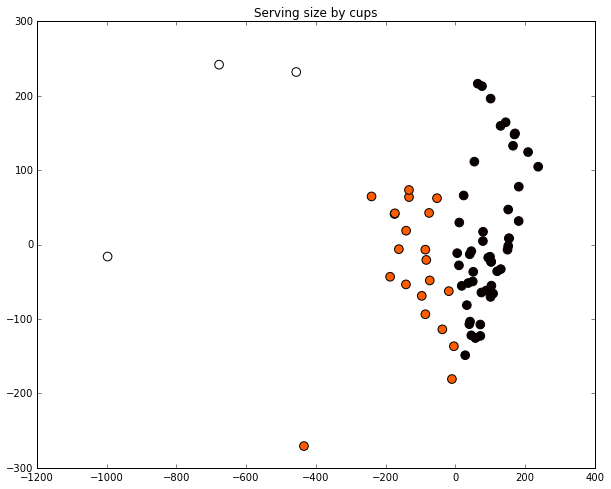

In [391]:
plt.scatter(reduced_data_2[:, 0], reduced_data_2[:, 1], c=pred_2, s=75, cmap= 'hot')
plt.title('Serving size by cups')

There is a lot less variance here. Let's see what we can explain.

In [192]:
data_3 = data_1.drop('shelf',1)

In [193]:
data_3['normweight'] = data_3.weight.apply(v)

In [199]:
data_3p1 = data_3.multiply(data_3.normweight, axis =0)

In [204]:
data_3p2 = data_3p1.drop(['weight', 'normweight'], axis=1)

In [205]:
pca_3 = PCA()
pca_3.fit(data_3p2)
reduced_data_3 = pca_3.transform(data_3p2)

In [210]:
kmeans_3 = KMeans(7)
pred_3 = kmeans_3.fit_predict(reduced_data_3)

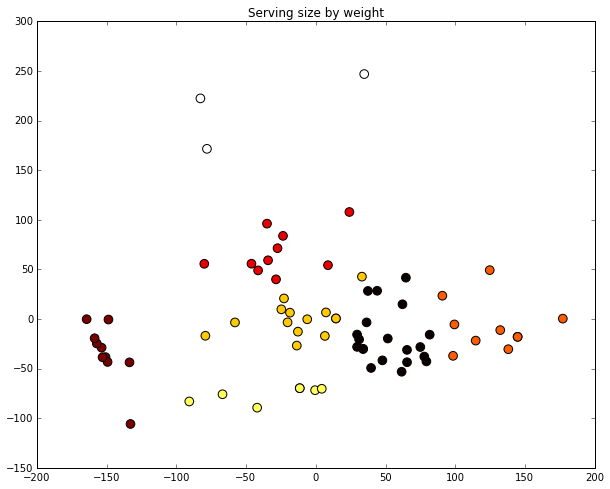

In [392]:
plt.scatter(reduced_data_3[:, 0], reduced_data_3[:, 1], c=pred_3, s=75, cmap= 'hot')
plt.title('Serving size by weight')

#### Because there is a bit more variance on weight, I will proceed with data normalized on cup size.

In [370]:
index_2 = data_2.index
predilections_2 = list(pred_2)
zip_1 = list(zip(index_2, predilections_2))

In [371]:
new_data_2 = pd.DataFrame(zip_1, columns=['name', 'cluster'])

In [372]:
new_data_2.set_index('name', inplace=True)

In [373]:
data_2p3 = data_2.drop(['cups', 'normcup'], axis =1)

In [374]:
new_data_2 = data_2p2.join(new_data_2)

###This function generates plots comparing the nutrient means between clusters

In [376]:
def nutrient(name, group):
    elle = []
    c = random.choice(['k', 'm', 'c', 'b', 'r'])
    n = random.random()
    for i,e in group:
        #e.drop('cluster', inplace =True, axis=1)
        elle.append(e[name].mean())
    return (plt.bar(range(len(elle)), elle, alpha=n, color=c), 
            plt.title(name.title()), plt.xlabel('Clusters'), plt.ylabel('Amount'))

In [398]:
group_2 = list(new_data_2.groupby('cluster'))

###Categories by cluster:
                       1: Generally Unhealthy
                       2: Generally more Healthy
                       3: Hippy Crap (The major outliers on the 'cup' graph above)
                     

In [395]:
plt.rcParams['figure.figsize'] = 8, 6

(<Container object of 3 artists>,
 <matplotlib.text.Text at 0x120c4ceb8>)

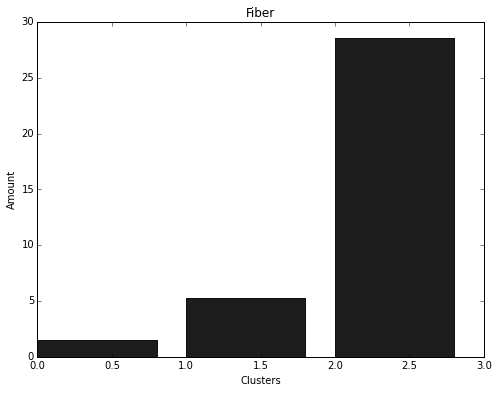

In [396]:
nutrient('fiber', group_2)

(<Container object of 3 artists>,
 <matplotlib.text.Text at 0x120f6cac8>)

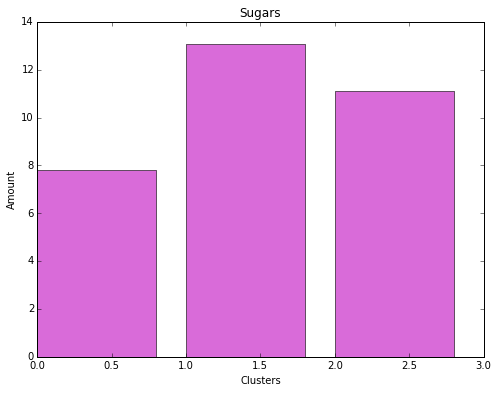

In [397]:
nutrient('sugars', group_2)

(<Container object of 3 artists>,
 <matplotlib.text.Text at 0x12109df28>)

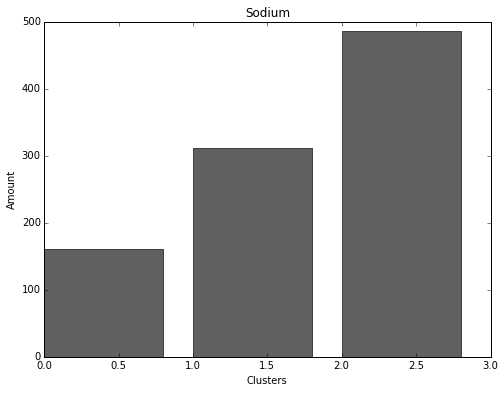

In [402]:
nutrient('sodium', group_2)

(<Container object of 3 artists>,
 <matplotlib.text.Text at 0x1211c7d68>)

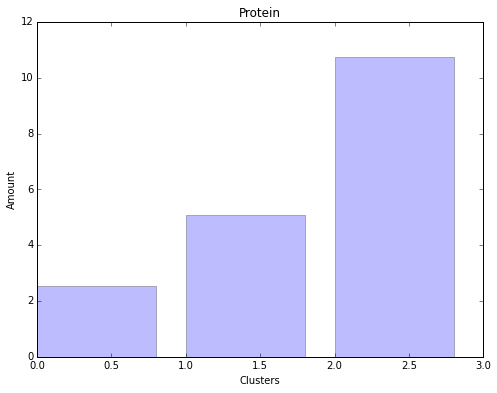

In [403]:
nutrient('protein', group_2)

#####It seems my hypothesis has both some Truthiness and so Falsiness to it. In truth, the primary clusters have fewer good ingredients, but, in a fog of deception, the latter clusters also have more bad ingredients. I blame this confusion of the sample size, if there were more hippy cereals, then I believe the amount of bad ingredients in the last cluster would go down.